In [1]:
# Import packages for statistical analysis
import numpy as np
import scipy.stats as stats
import pandas as pd

# Import package for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
yrbss = pd.read_csv('./Data/yrbss.csv')
yrbss.head()

,age,gender,grade,hispanic,race,height,weight,helmet_12m,text_while_driving_30d,physically_active_7d,hours_tv_per_school_day,strength_training_7d,school_night_hours_sleep
0,14.0,female,9,not,Black or African American,NaN,NaN,never,0,4.0,5+,0.0,8
1,14.0,female,9,not,Black or African American,NaN,NaN,never,NaN,2.0,5+,0.0,6
2,15.0,female,9,hispanic,Native Hawaiian or Other Pacific Islander,1.73,84.37,never,30,7.0,5+,0.0,<5
3,15.0,female,9,not,Black or African American,1.60,55.79,never,0,0.0,2,0.0,6
4,15.0,female,9,not,Black or African American,1.50,46.72,did not ride,did not drive,2.0,3,1.0,9


In [3]:
heights=yrbss['height'].dropna().values

### Parameter
**Parameter** is an characteristic of the population. Parameters may be used to describe the probability distribution, for example a normal distribution is definded by two parameters, the mean and the standard deviation. If these are specified, the entier distribution is precisely knwon.  
Parameters are fixed constants, however, their values are usually unknown because it is infeasible to measure the entier population.

In [4]:
# Suppose that the heights dataset is the population of interest, the population means is thus calculated as;
pop_mean=heights.mean()
pop_mean

1.6912409571508071

In [5]:
# Population standard deviation is;
pop_std=heights.std()
pop_std

0.10469308968966508

### Point Estimates
The sample statistices provide a 'best guess' for the value of a parameter, and are called an **estimator**.

The value calculated for an estimator is called an **point estimate** and can generally very from one sample to another.
As an example, the sample mean ($\bar x$) is an estimator for the population mean($\mu$)

When the expected value of a sample statistic is equal to the population parameter, the sample statistic is said to be an **unbiased estimator**.


In [6]:
# Suppose we take sample of 10 observations;
sample_heights=np.random.choice(heights,100)
sample_heights.mean()

1.7024999999999999

If we were to take multiple random samples from the population we can build up a **sampling distribution**, which represents the distribution of the point estimate bases on samples of a fixed size.

In [7]:
# Sampling distribution for 1000 samples of size 100
def sample_dist(population, sample_size, samples):
    sample_means=[]
    
    for draw in range(samples):
        sample = np.random.choice(population,sample_size)
        sample_means.append(sample.mean())
        
    return sample_means

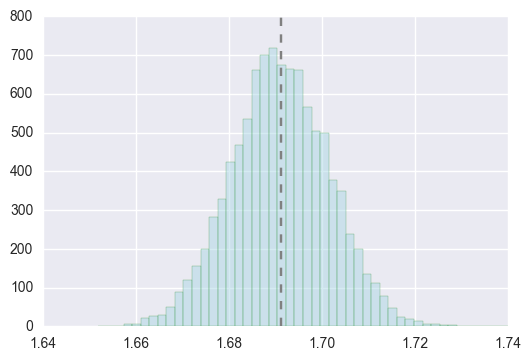

In [8]:
sample_mean=sample_dist(heights,100,10000)

plt.hist(x = sample_mean, bins = np.linspace(1.65, 1.74, 50), edgecolor = 'g', alpha = 0.5, color = 'lightblue')
plt.vlines(pop_mean,ymax=800,ymin=0,linestyles='dashed', colors='gray');

The distribution of the sample means (point estimate) tend to 'fall around' the population mean (parameter). With some variability around the population mean. This variability can be quantified by taking the standard deviation of the sample means.

### Sampling and Non-sampling Errors
When the samples are selected randomly, rarely would we get the sample statistic that equals the population parameter. The difference between the value of a sample statistic obtained and the value of the corresponding population parameter is called the **sampling error**.

The sampling error occures because of chance, errors that occure for other reasons, such as errors made in data collection, non-random sampling or human error, are called **nonsampling error**.

For sample and population mean;
$$\mu - \bar x = \text{sampling error + nonsampling error}$$



### Central Limit Theorem
If a sample consist of at least 30 independent observations and the data are not strongly skewed, then the distribution of the sample means can be approximated by a normal model.

The standard deviation associated with an estimate is called the _**standard error**_, and describes the typical error or uncertainty associated with the estimate. 

When the sampling distribution is for the sample mean,  this is called the _standard error of the mean_ (SEM) and is equal to;
$$SE=\frac{\sigma}{\sqrt{n}}$$

Since the population standard deviation is seldom known, the standard error of the mean is usually estimated as;
$$SE=\frac{s}{\sqrt{n}}$$
where $s$ is the sample standard deviation.

A large SEM indicates that there is lot of variability between the means of different samples. As the sample size increase the variability between sample means reduce.

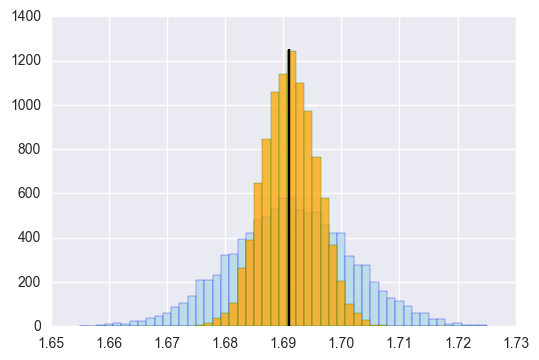

In [9]:
# Computing sampling means for 10000 samples of size 100
sample_dist1 = sample_dist(heights,100,10000)

plt.hist(x = sample_dist1, bins = np.linspace(1.655, 1.725, 50), edgecolor = 'blue', alpha = 0.75, color = 'lightblue' )

# Computing sampling means for 10000 samples of size 500
sample_dist2 = sample_dist(heights,500,10000)

plt.hist(x = sample_dist2, bins = np.linspace(1.655, 1.725, 50), edgecolor = 'g', alpha = 0.75, color = 'orange')
plt.vlines(1.691,ymax=1250,ymin=0);

The *z values* for a given sample mean can be calculated as;
$$z=\frac{\bar x - \mu}{SE_{\bar x}}$$
where $SE_{\bar x}$ is the standard error.

### Confidence Interval
A point estimate provides a single plausible value for a parameter. However, a point estimate is rarely perfect. Instead it logical to providing a plausibe _range of values_ within which the true parameter value will fall. Such a range is called **_confidence interval_**. Each confidence interval is constructed with regard to a **confidence level**, which states the probability that the confidence interval contains the true population parameter.

For a normal distribution, 95% of observations fall within 1.96 standard deviations of the mean. Thus,
$$P(-1.96 \leq Z \leq 1.96)=.95$$

Sampling distribution of $\bar x$ is nearly normal when; 
1. Sample size is large ($n \geq 30$ is a good rule of thumb) 
2. Sample observations are independent
3. The population distribution is not strongly skewed

Under these conditions the sampling distribution is nearly normal with a mean of $\mu$ and a standard deviation of $SE_\bar x$. For a random variable $\bar x$;

$$P(-1.96 \leq \frac{\bar x - \mu}{SE_\bar x}\leq 1.96)=.95$$

$$P(-1.96\times{SE_\bar x} \leq \bar x - \mu \leq 1.96\times{SE_\bar x})=.95$$

$$P(\bar x - (1.96\times{SE_\bar x}) \leq \mu \leq \bar x  + (1.96\times{SE_\bar x}))=.95$$

Thus the interval $\bar x \pm (1.96\times{SE_\bar x})$ is called the 95% confidence interval for the mean.

If we generated many samples, we would expect approximately 95% of the samples to product confidence intervales that correctly contain the population mean.

Generally, if the point estimates follows the normal model with standard error SE, then a confidence interval for the population parameter is;
$$\text{point estimate} \pm z^*SE$$
where $z^*$ correspond to the confidence level selected.
The value $z^*SE$ is called the **margin of error**

In [10]:
# Suppose we have 100 samples with 100 observations each
# We'll store the sample mean and the corresponding [margin of error]
sample_mean = []
margin_err =[]

for sample in range(100):
    sample_heights = np.random.choice(heights,100)
    sample_mean.append(sample_heights.mean())
    margin_err.append(1.96 * (np.std(heights)/np.sqrt(100)))

(0, 101)

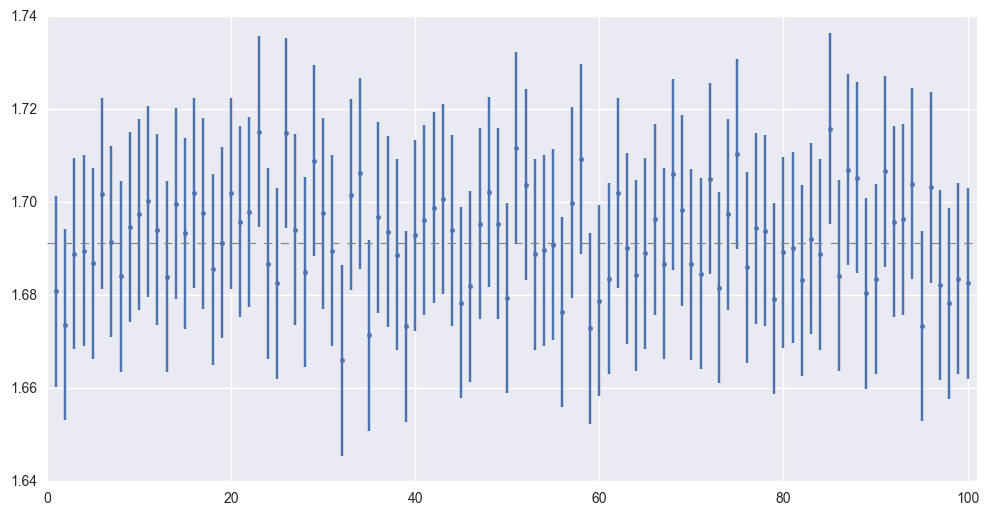

In [11]:
plt.figure(figsize=(12,6))
plt.errorbar(x=np.arange(1,101),y=sample_mean, yerr=margin_err,linestyle='None',marker='.')
plt.hlines(y=np.mean(heights), xmin= 0, xmax= 101, linestyles='dashed', color ='gray',linewidth = 0.8)
plt.xlim((0,101))

In [12]:
# Counting how many of the samples captured the population mean.
conf_int=[]
for sample in range(100):
    if np.mean(heights) >= (sample_mean[sample] - margin_err[sample]) and np.mean(heights) <= (sample_mean[sample] + margin_err[sample]):
        conf_int.append(True)
    else:
        conf_int.append(False)

print ('Number of confident intervals capturing the true mean:', np.sum(conf_int))

Number of confident intervals capturing the true mean: 96


### T-distribution
In situations where the population is normal but its standard deviation $\sigma$ is unknown, the **Student's *t* distribution** should be used instead of the normal z distribution.  

Like the normal distribution, the *t* distribution curve is symmetric about the mean, however it is flatter and wider than the standard normal curve. i.e it has larger standard deviation. However, as the sample size increase, the *t* distribution approaches the standard normal distribution. 

The shape of a particular *t* distribution depends on the number of degrees of freedom. The larger the degrees of freedom, the more closely the distribution approximates the normal model.

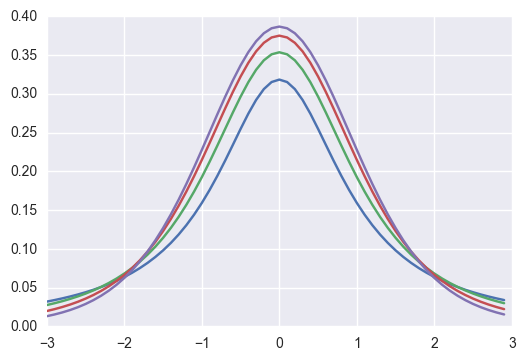

In [8]:
for df in [1,2,4,8]:
    x = np.arange(-3,3,0.1)
    plt.plot(x, stats.t.pdf(x,df = df))

To proceed with the *t* distribution for inference about a single mean, we first check two conditions,  
* Independence of observations  
    If the random sample consist of less than 10% of the population, or if the data are from an experiment or random process
* Observations come from a nearly normal distribution  

When using a *t* distribution we can revide the confidence interval formula as;
$$\bar x \pm t^*_{df}SE_{\bar x}$$
Where $t^*_{df}$ is obtained from *t* distribution for n-1 degrees of freedom and a given confidence level.

#### Hypothesis Testing
A hypothesis test evaluates two mutually exclusive statements about a population to determine which statement is best supported by the sample.

The null hypothesis ($H_0$) often represent either a skeptical perspective that there is no change, no effect, no difference. The alternative hypothesis states an alternative claim under consideration. It is always useful to state the null hypothesis as an equality($\mu=7$) while the alternative always uses an inequality ($\mu > 7, \mu < 7$, or $\mu \neq 7$). The parameter value if the null value is true is called the null value.

We will not reject the null hypothesis ($H_0$), unless there is convincing evidence in favor of the alternative hypothesis.

#### Types of Errors
When we carry out a hypothesis test, there are two types of mistakes we could make.  
Rejecting the null hypothesis when it is true is a **type 1 error**. A **type 2 error** occures when we fail to reject the null hypothesis when the alternative is actually true.

<table>
<tbody>
  <tr>
    <td> </td>
    <td> </td>
    <td colspan="2" align="right">**Test Conclusion**</td>
  </tr>
  <tr>
    <td rowspan = "4">**Truth**</td>
    <td></td>
    <td>Do not reject $H_0$</td>
    <td>Reject $H_0$ in favor of $H_A$</td>
  </tr>
    <tr>
    <td></td>
    <td>$H_0$ is true</td>
    <td>Ok</td>
    <td>Type I error</td>
  </tr>
    <tr>
    <td></td>
    <td>$H_A$ true</td>
    <td>Type II error</td>
    <td>Ok</td>
  </tr>
</tbody>
</table>

The probability of a Type 1 error (rejecting a true null hypothesis) is denoted by $\alpha$, and is refered to as the level of significance. The probability of a Type 2 error (not rejecting a false hypothesis) is denoted by $\beta$

#### Test Statistic
Test statistic is a value computed from the sample data that can be used to check the agreement between the sample data and the null hypothesis.

For an example, supposing the null hypothesis ($\mu_0 = 3.09$) is true, we can create the sampling distribution for the YBRSS data as follows;

In [43]:
yrbss_sample = pd.read_csv('./Data/yrbss_samp.csv')
strengh_training = yrbss_sample['strength_training_7d'].dropna()
strengh_training_mean =  strengh_training.mean()
strengh_training_std =  strengh_training.std()

strengh_training_se = strengh_training_std/np.sqrt(len(strengh_training))

null_value = 3.09

print ('Sample Mean: \t',strengh_training_mean)
print ('Difference Between the null value and the sample mean:\t', null_value - strengh_training_mean)
print ('\nSample Standard Deviation:\t',strengh_training_std)
print ('Standard Error (Std. of the sampling distribution):\t',strengh_training_se)

Sample Mean: 	 2.78
Difference Between the null value and the sample mean:	 0.31000000000000005

Sample Standard Deviation:	 2.5764277203096153
Standard Error (Std. of the sampling distribution):	 0.257642772031


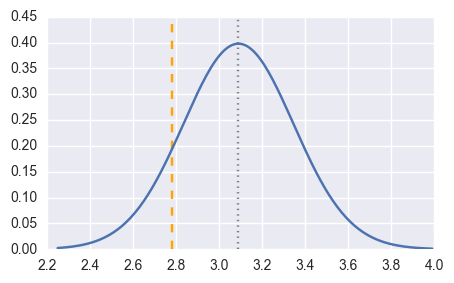

In [45]:
x = np.arange(2.25,4,0.01)
sampling_dist = stats.t(loc = null_value, scale = strengh_training_se, df = len(strengh_training)-1)

plt.figure(figsize=(5,3))
plt.plot(x, sampling_dist.pdf(x)*strengh_training_se)
plt.vlines(null_value, ymin= 0, ymax= 0.45, linestyles= 'dotted', colors= 'grey')
plt.vlines(strengh_training_mean, ymin= 0, ymax= 0.45, linestyles= 'dashed', colors= 'orange')

In [47]:
## Using the sampling distribution we can calculate the probability of getting a sampling mean less than or equal to the observed sample mean
sampling_dist.cdf(strengh_training_mean)

0.11588102561619848

Typically when performing a hypothesis test about the population mean we will not rely on the sampling distribution to calculate the differece between the null value and the sample mean, instead we will use the test statistic $t$, which has **_t distribution_**, to perform the hypothesis testing about the population mean $\mu$, the **t** statistic is calculated as;
$$t = \frac{\bar x -\mu}{SE_x}$$

In [48]:
t_value = (strengh_training_mean - null_value) / strengh_training_se

print (t_value)

-1.20321636643


In [50]:
t_dis = stats.t(df= len(strengh_training)-1)
t_dis.cdf(t_value)

0.11588102561619848

 

#### One-Tailed and Two Tailed Tests
When we state the null hypothesis as an equality (i.e $\mu=3.09$) there are three possible alternative hypothesis;

$H_a \neq 3.09$  : Two sided hypothesis  
$H_a < 3.09$  : one sided hypothesis  (left tailed test)  
$H_a > 3.09$  : one sided hypothesis  (right tailed test)

We will always use an two sided test unless it made clear prior to data collection that the test should be one sided. 


In [15]:
se = strengh_training.std()/np.sqrt(len(strengh_training))
ci = [strengh_training.mean()-1.96*se,strengh_training.mean()+1.96*se]
ci

[2.2750201668193153, 3.2849798331806843]

In [16]:
t_value = (strengh_training.mean() - 3.09)/se
p_value = stats.t.cdf(t_value,df=len(strengh_training)-1 )*2
p_value

0.23176205123239696

In [17]:
stats.ttest_1samp(strengh_training,3.09)

Ttest_1sampResult(statistic=-1.2032163664298205, pvalue=0.23176205123239688)

### Checking for Normality in Sample
In many statistical tests we assume that the sampling distribution is normally distributed. However, since we do not have access to this distribution, we cannot look at the shape and see whether it is normally distributed. However, we know that if the sample data is approximately normal then the sampling distribution will be so as well.

#### Visual Methods for checking normaity
Normal Probalility plots (quantile - quantile plot) can be used to assess the normality of a distribution. Q-Q plot plots the expected quantile of the data if the data is normally distributed against the actual scores. If the values fall on a diagonal line then the variable is normally distributed, but deviations from the diagonal show deviations from normality.

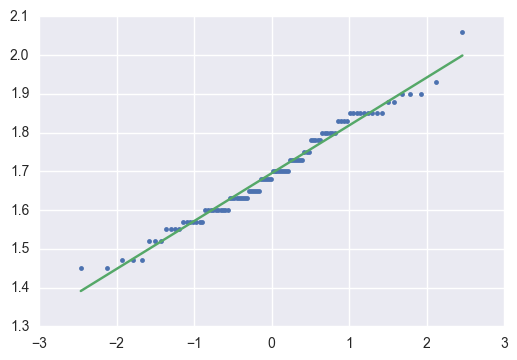

In [18]:
sample= np.random.choice(heights,100)

osm, osr = stats.probplot(sample)[0]
slope, intercept, r = stats.probplot(sample)[1]
plt.plot(osm, osr,marker='.',linestyle='None')
plt.plot(osm , slope*osm +intercept)

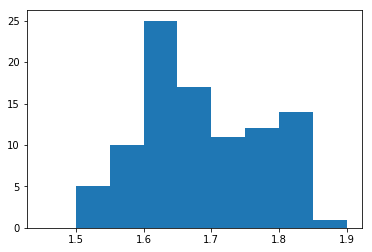

In [13]:
plt.hist(sample,bins=np.arange(1.450,1.950,.05));

pvalue less than 0.05 indicates a deviation from normality.

The skew and the kurtosis of a distribution can be calculated using the functions skew() and kurtosis() functions. The values should be zero in a normal distribution. Positive values of skew indicates a pile-up of scores on the left of the distribution, whereas negative values indicate a pile-up on the right. Further the value is from zero, the more likely it is that data is not normally distributed.

In [14]:
print 'Skew of the distribution', stats.skew(sample)
print 'kurtosis of the distribution', stats.kurtosis(sample)

Skew of the distribution 0.368091822882
kurtosis of the distribution -0.375431444581



skewtest() and kurtosistest() functions can be used to see if the the skew and the kurtosis is different from a normal distribution.

In [15]:
stats.skewtest(sample)

SkewtestResult(statistic=1.5585373511027543, pvalue=0.11910592097585736)

In [16]:
stats.kurtosistest(sample)

KurtosistestResult(statistic=-0.66445527691337902, pvalue=0.50639896399786166)

Large samples will give rise to small standard errors and so when sample size are big, significant values will arise even from small deviations from normality. In larger samples it's OK to look for smaller p values. If the sample size is more than 200 or more it is more important to look at the shape of the distribution visually and to look at the values of the skew and kurtosis rather than calculate their significance.

#### Shapiro-Wilk test
Shapiro-Wilk test compares the scores in the sample to a normally distributed set of scores from with the same mean and deviation. If the test is non-significant (p > 0.05) then the distribution of the sample can be assumed not to be significantly different  from a normal distribution. If the test is significant (p < 0.05) then the distribution is significantly different from a normal distribution.

In [17]:
stats.shapiro(sample)

(0.9739632606506348, 0.04477466642856598)

With large sample sizes it is very easy to get significant results from small deviations from normality.

In [18]:
stats.anderson(sample)

AndersonResult(statistic=0.75061406722498702, critical_values=array([ 0.555,  0.632,  0.759,  0.885,  1.053]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))